# 11. 데이터 전처리와 파생변수 생성

잘못된 데이터는 통계적 편향을 증가 => 데이터 전처리 필요

### 11.1 결측값 처리
- 결측값 비중이 1% 미만으로 작다면 무시하고 분석해도 무방
- 결측값 비율, 한 변수에 결측값이 몰려 있는 지 등을 파악

**📖 결측치 종류**
- 완전 무작위 결측(MCAR : Missing Completely at Random) : 순수하게 결측값이 무작위로 발생한 경우 <br>
    -> 이런 경우는 결측값 포함한 데이터 제거해도 bias가 거의 발생 X <br>
- 무작위 결측(MAR : Missing at Ramdom) : 다른 변수의 특성에 의해 해당 변수의 결측치가 체계적으로 발생한 경우<br>
    -> 이런 경우 특정 데이터에(결측치) 대해 영향을 받음<br>
- 비무작위 결측(NMAR : Missing at Not Random) : 결측값들이 해당 변수 자체의 특성을 갖고 있는 경우<br>
    -> 예) 고객소득 특정 구간에서 자신의 소득을 숨긴경우 등 <br>
    -> 결측된 값이 실제로 무엇인지 확인 X, 비무작위 결측을 확인하는 것은 어려움


🔎 결측치 처리 방법
1. 표본 제거 방법 <br>
    - 데이터에서 결측값 비율이 10% 미만일 때 많이 사용 <br>
    - 결측값을 무시하면 데이터가 편중되어 편향이 발생할 위험도 있음 <br>
2. 평균 대치법 <br>
    - 사용하기 간단, 결측 표본 제거 방법의 단점 어느정도 보안 <br>
    - 평균을 사용하기 떄문에, 통계량의 표준오차가 왜곡되어 축소됨. 따라서 p-value가 부정확 <br>
=> 표본제거방법과 평균 대치법은 완전 무작위 결측이 아닌 경우 비추천<br>
3. 보간법 (시계열 특성)<br>
    - 데이터가 시계열적 특성을 가지고 있을 때 효과적<br>
4. 회귀대치법<br>
    - 해당 변수와 다른 변수 사이의 관계성을 고려하여 결측값을 계산<br>
    - 추정하고자 하는 결측값을 가진 변수를 종속변수, 나머지 변수를 독립변수로 하여 추정한 회귀식을 통해 결측값 대치<br>
    - 결측된 변수의 분산을 과소 추정하는 문제<br>
=> 과소 추정 문제를 해결하기 위해 나온 확률적 회귀대치법<br>
5. 확률적 회귀대치법<br>
    - 인위적으로 회귀식에 확률 오차항을 추가함 -> 변동성 조정<br>
    - 여전히, 어느정도 표본 오차를 과소 추정하는 문제 있음
6. 다중 대치법
    - 단순대치를 여러번 수행하여 n개의 가상적 데이터를 생성 -> 평균으로 결측값을 대치하는 방법
    1) 대치 단게 
        - 몬테카를로(MCMC), 연쇄시긍ㄹ 통한 다중 대치(MICE)
    2) 분석 단계
    3) 결합 단계

### 11.1.1 결측값 처리 실습

In [98]:
# 필요 패키지 설치 및 import

# !pip install missingno
# !pip install scikit-learn
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [99]:
# 데이터 불러오기
df = pd.read_csv("datasets/bike_sharing_daily.csv")

# 데이터 샘플 확인
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600


In [100]:
# 각 컬럼의 속성 및 결측값 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        714 non-null    float64
 10  atemp       707 non-null    float64
 11  hum         706 non-null    float64
 12  windspeed   718 non-null    float64
 13  casual      720 non-null    float64
 14  registered  720 non-null    float64
 15  cnt         731 non-null    int64  
dtypes: float64(6), int64(9), object(1)
memory usage: 91.5+ KB


In [101]:
# 결측값 수만 확인

df.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum           25
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

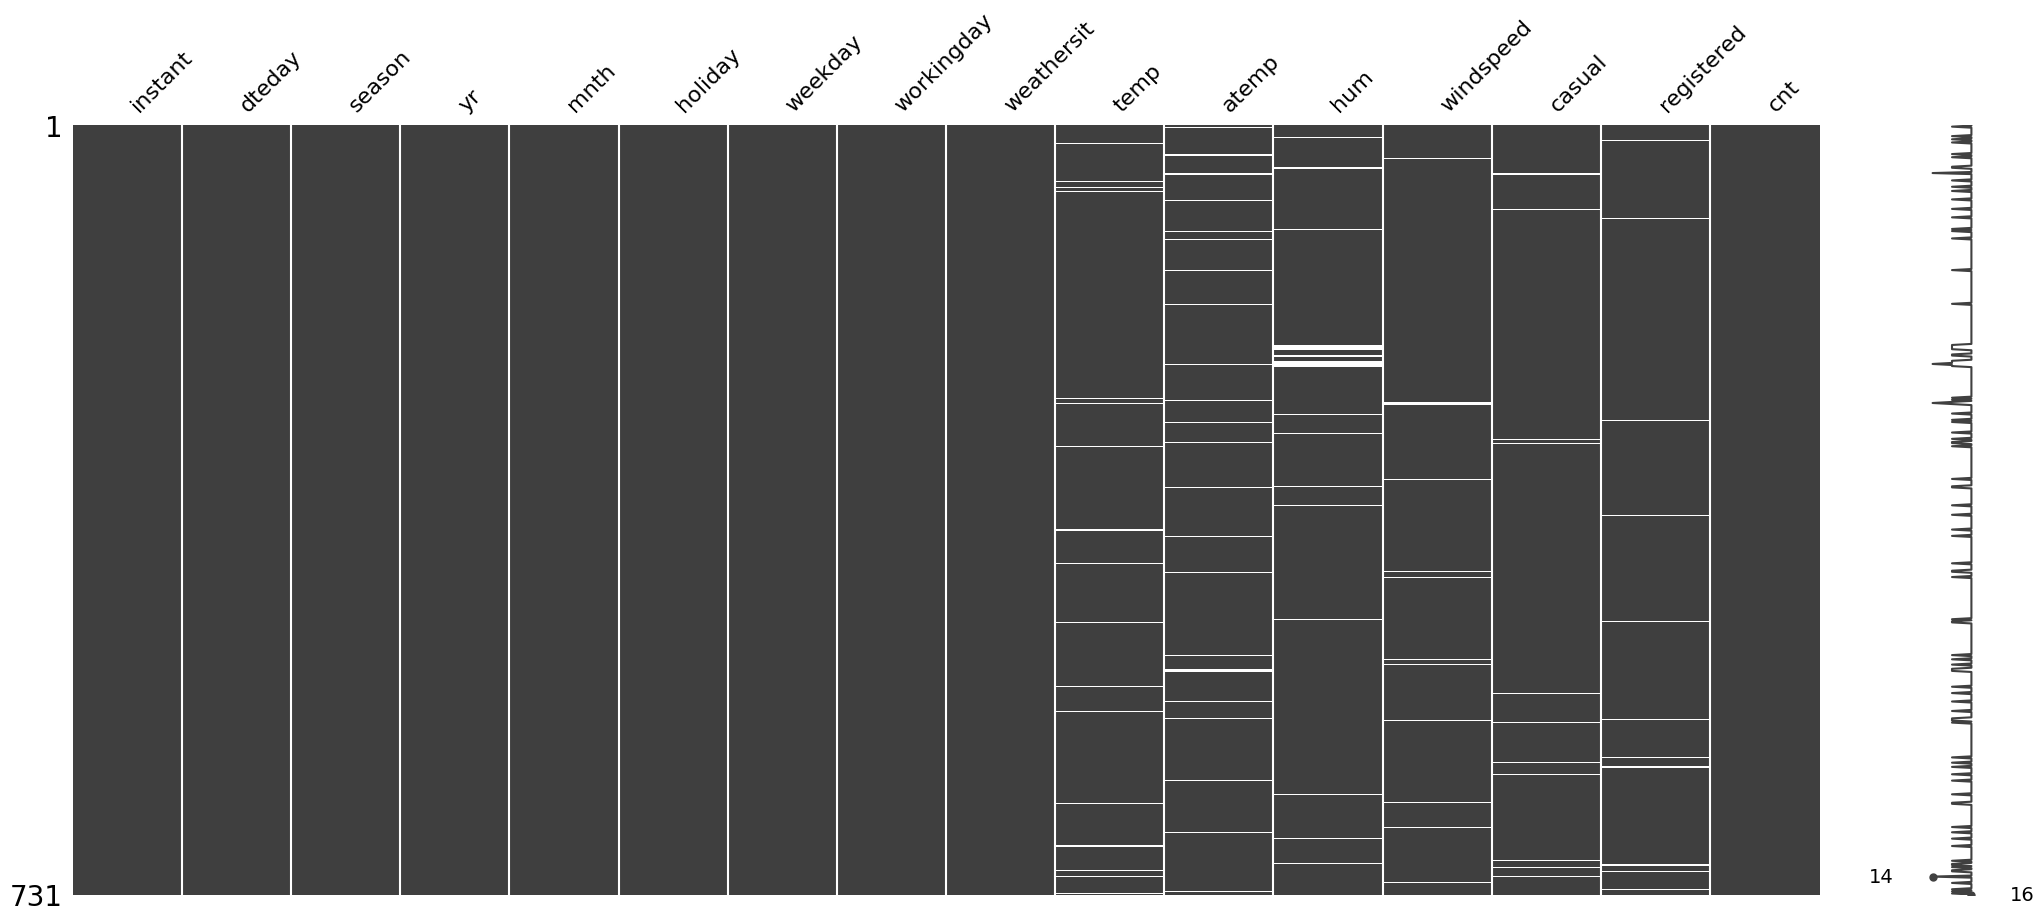

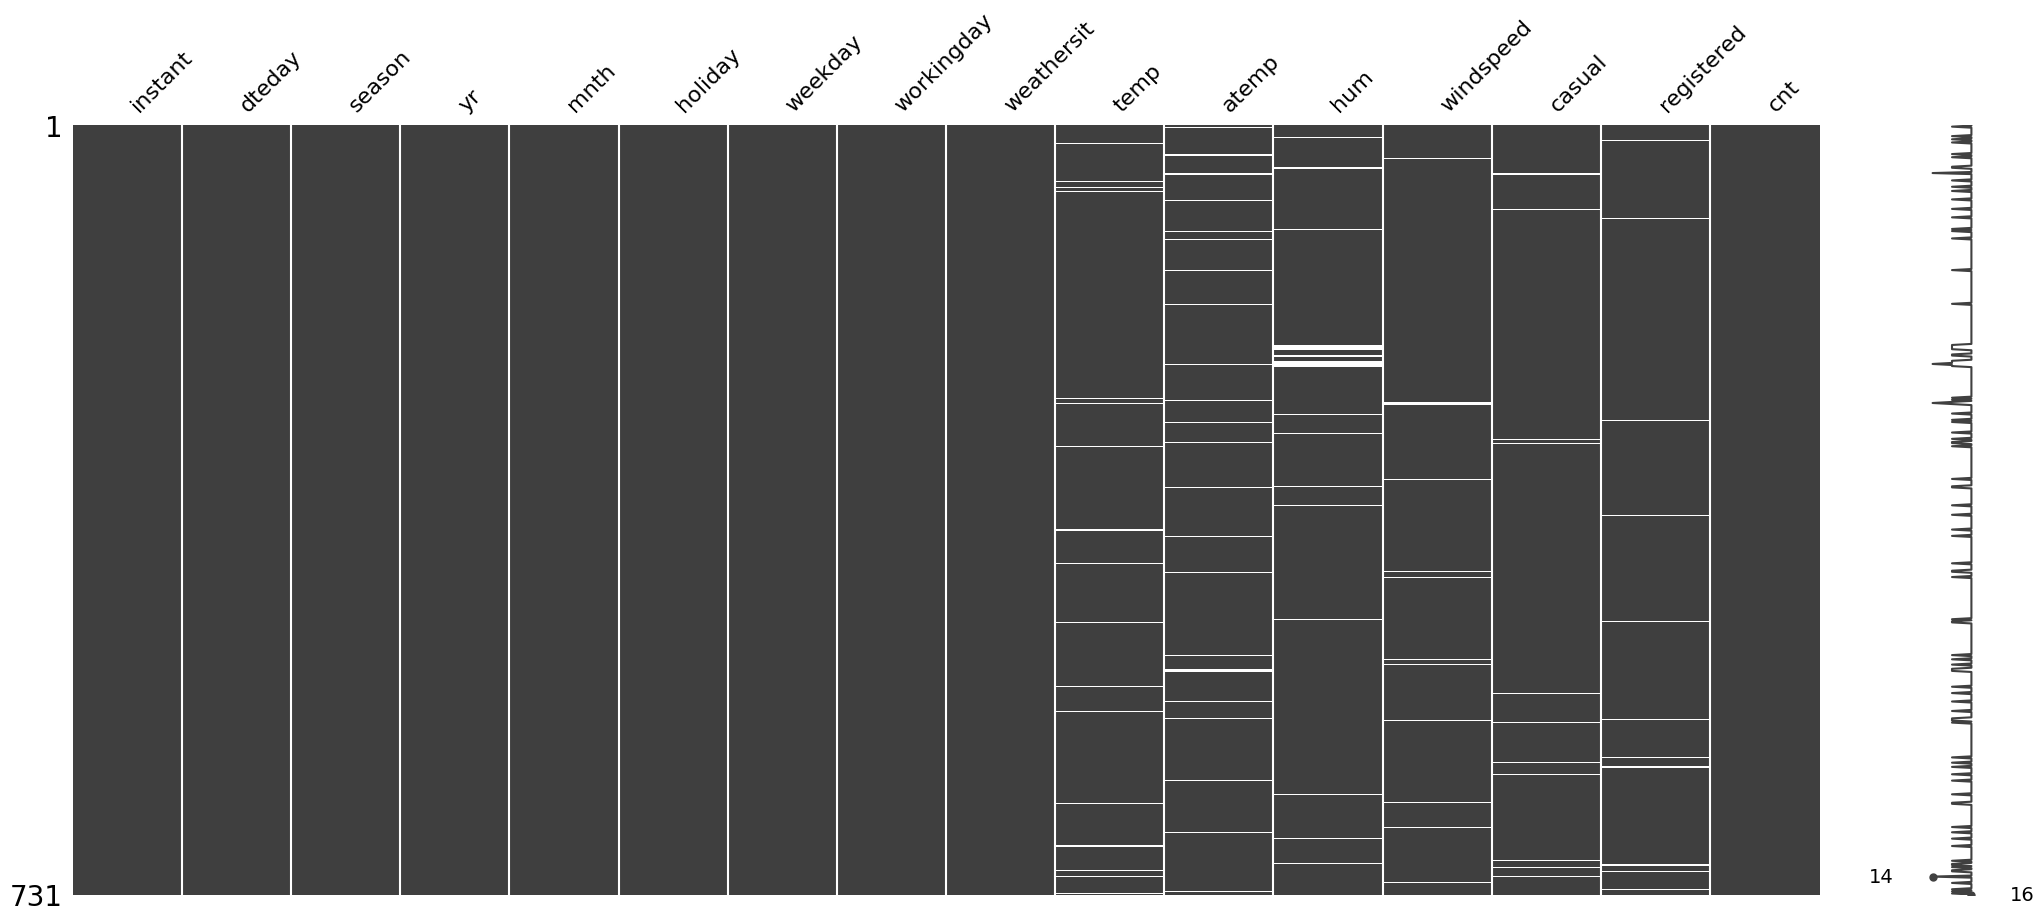

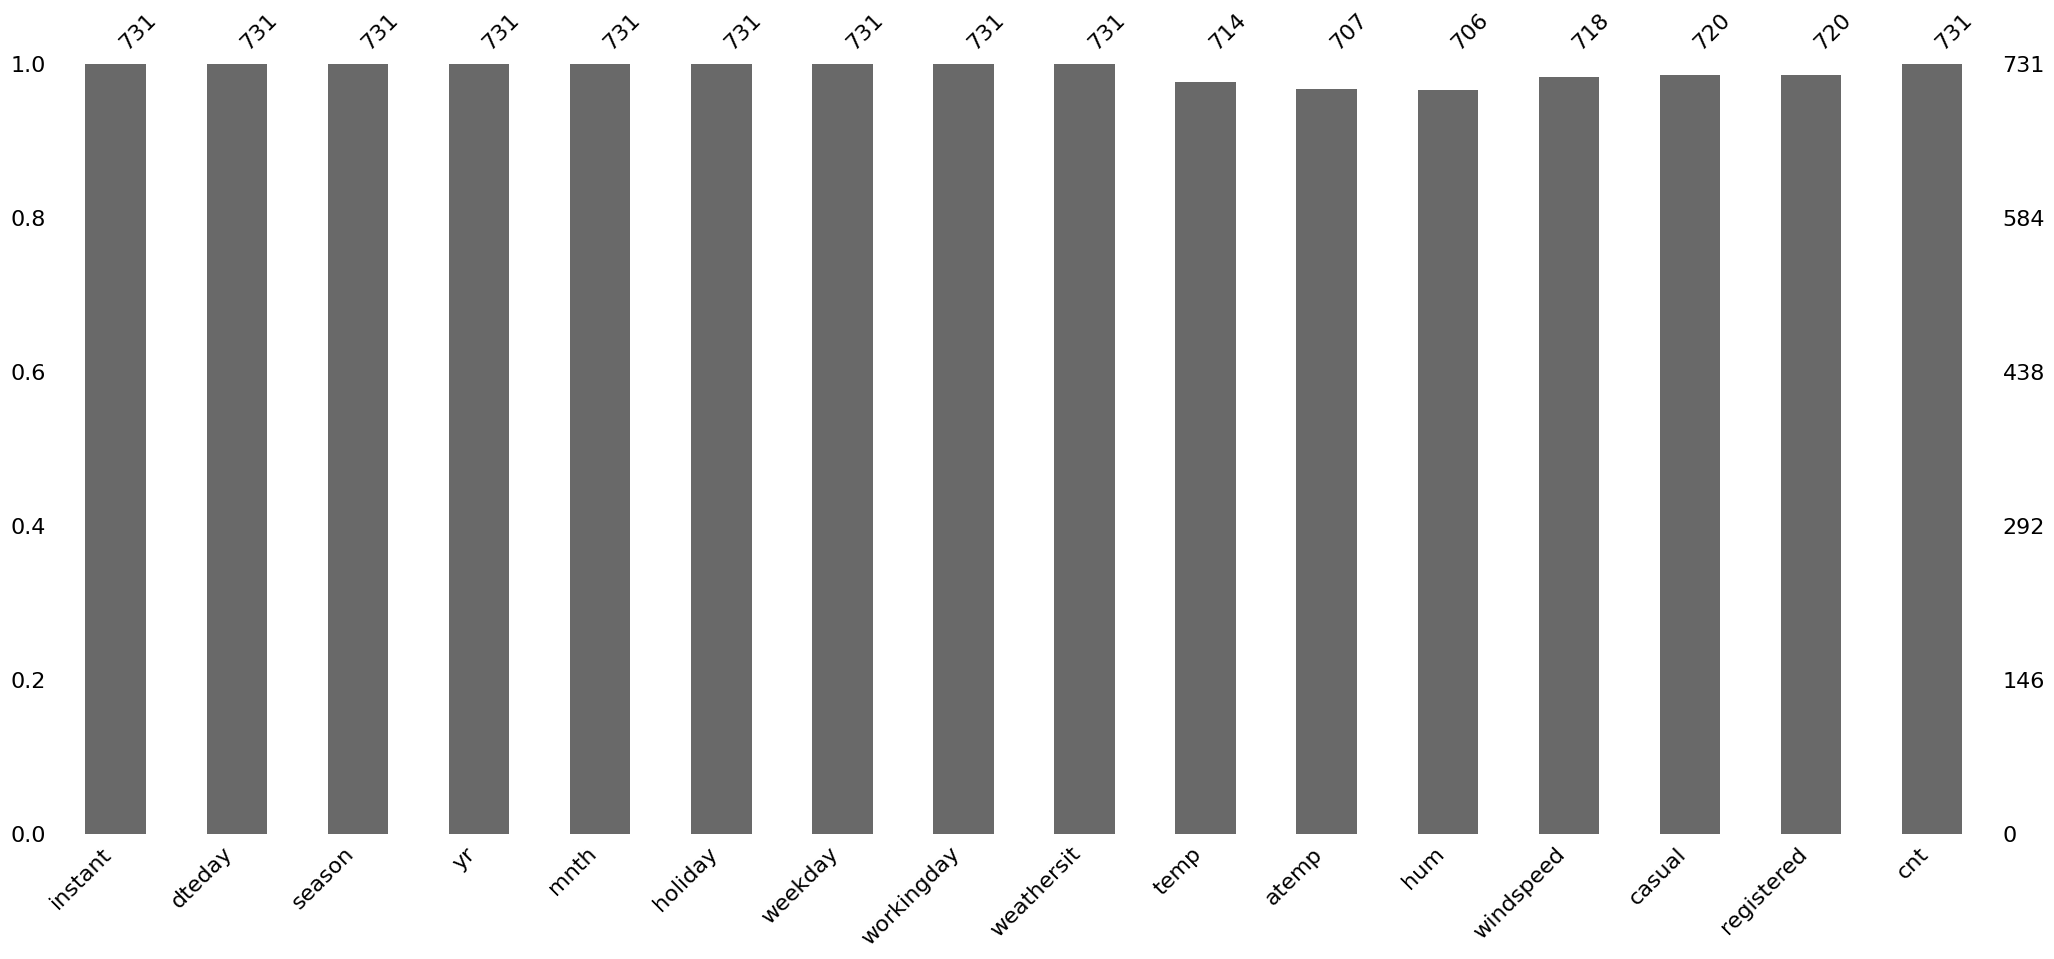

In [102]:
# 결측값 시각화 - 전체 컬럼의 결측값 시각화

# 결측값 영역 표시
msno.matrix(df)
plt.show()

# 결측값 영역 표시
msno.matrix(df)
plt.show()

# 결측값 막대그래프
msno.bar(df)
plt.show()

결측치를 시각화하여 보면 더 직관적으로 알 수 있다! 이를 통해, 결측값을 보다 직관적으로 파악할 수 있다.

hum 칼럼이 연속적으로 결측값을 많이 가지고 있는 것을 확인할 수 있다.

In [103]:
# 결측값이 아닌 빈 문자열이 있는 지 확인

def is_emptystring(x):
    return x.eq('').any()

df.apply(lambda x:is_emptystring(x))

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [104]:
# 결측값 표본 제거

# 모든 컬럼이 결측값이 행 제거
df_drop_all = df.dropna(how='all')

# 세 개 이상의 컬럼이 결측값인 행 제거
df_drop_3 = df.dropna(thresh = 3)


# 특정 컬럼(temp)가 결측값인 행 제거
df_drop_slt = df.dropna(subset=['temp'])

# 한 컬럼이라도 결측치가 있는 행 제거
df_drop_any = df.dropna(how = 'any')

df_drop_any.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [105]:
## 결측값 기본 대치 방법들

# 특정값(0)으로 대치 - 전체 컬럼
df_0_all = df.fillna(0)

# 특정값(0)으로 대치 - 칼럼 지정
df_0_slt = df.fillna({'temp':0})

# 평균값 대치 - 전체 칼럼
# df_mean_all = df.fillna(df.mean())

# 평균값 대치 - 칼럼 지정
df_mean_slt = df.fillna({'temp': df['temp'].mean()})

# 중앙값 대치 - 전체 칼럼
df_median_all = df.fillna({'temp':df['temp'].median()})

# 최빈값 대치 - 전체 칼럼
# df_mode_all = df.fillna(df.mode())

# 최빈값 대치 - 칼럼 지정
df_mode_slt = df.fillna({'temp':df['temp'].mode()})

# 최댓값 대치 - 전체 칼럼
# df_max_all = df.fillna(df.max())

# 최댓값 대치 - 칼럼 지정
df_max_slt = df.fillna({'temp' : df['temp'].max()})

# 최솟값 대치 - 전체 칼럼
# df_min_all = df.fillna(df.min())

# 최솟값 대치 - 칼럼 지정
df_min_slt = df.fillna({'temp' : df['temp'].min(), 'hum' : df['hum'].min()})

df_min_slt.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp         24
hum            0
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

In [106]:
# 보간법 함수 사용하여 대치 - 단순 순서 방식 - 에러 발생함!
ts_intp_linear = df.interpolate(method = 'values')

시점 인덱스를 사용하기 위해서는, 시간형 칼럼을 시계열 객체로 변환한 후에 인덱스로 설정해 줘야함! <br>
-> interpolate() 함수 사용

In [107]:
# 결측치 보간 대치 방법 들

# 전 시점 값으로 대치 - 칼럼 지정
df1 = df.copy()
df1['temp'].fillna(method = 'pad', inplace = True)


# 뒤 시점 값으로 대치 - 전체 칼럼
df.fillna(method = 'bfill')

# 보간법 함수 사용하여 대치 - 단순 순서 방식
# ts_intp_linear = df.interpolate(method = 'values')

# 보간법 함수 사용하여 대치 - 시점 인덱스 사용
    # dteday 칼럼 시계열 객체 변환
df['dteday'] = pd.to_datetime(df['dteday'])

    # dteday 칼럼 인덱스 변경
df_i  = df.set_index('dteday')

    # 시점에 따른 보간법 사용
df_time = df_i.interpolate(method = 'time')

df_time.isnull().sum()

instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

다중 대치는 sklearn의 impute 패키지를 활용,<br>
- 우선 대치에 필요 없는 dteday 칼럼을 제거한 다음  <br>
- 다음 다중 대치 알고리즘을 적용해줌.

# 11.2 이상치 처리

- 이상치 : 일부 관측치의 값이 전체 데이터의 범위에서 크게 벗어난 값 <br>
    -> 데이터의 평균이나 총합 추정에 문제, 분산 과도하게 증가시킴, 모델링 정확도 감소 => 제거 필요

이상치 관련 방법들
1. 이상치 제거
2. 관측값 변경
3. 이상치 가중치 조정


이상치에 강건한 중위수, 중위수 절대 편차를 사용하는 것이 좋음


In [108]:
# 필요한 패키지 임포트
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [109]:
# 데이터 불러오기 

df = pd.read_csv("datasets/heart_2020_cleaned.csv")

# 데이터 샘플 확인
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [110]:
# BMI 칼럼의 분포 확인

df['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

중위수가 28.34이면서, 최댓값은 94인 3배 이상 차이가 나고 있음. (75% 31.42에 위치함)

이상치가 어느정도로 있지는 않을까? 확인해볼 필요가 있음

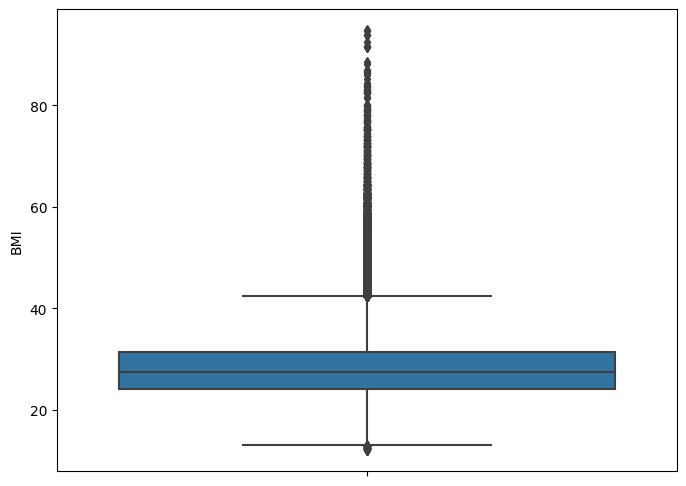

In [111]:
# BMI 칼럼의 박스플롯 시각화를 통한 이상치 확인

plt.figure(figsize = (8,6))
sns.boxplot(y = 'BMI', data = df)
plt.show()

제 3사분위수 위에 있는 부분에서 그 이상 관측치가 많이 분포되어 있는 것을 확인할 수 있다.

In [112]:
# BMI 칼럼의 이상치 제거(IQR *3)


# Q1, Q3 범위 정의

Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1 # IQR 범위
rev_range = 3 # 제거 범위 조절 변수 설정


# 이상치 범위 설정
filter = (df['BMI'] >= Q1 - rev_range * IQR) & (df['BMI'] <= Q3 + rev_range*IQR)
df_rmv = df.loc[filter]
print(df['BMI'])
print(df_rmv['BMI'].describe())

0         16.60
1         20.34
2         26.58
3         24.21
4         23.71
          ...  
319790    27.41
319791    29.84
319792    24.24
319793    32.81
319794    46.56
Name: BMI, Length: 319795, dtype: float64
count    318477.000000
mean         28.193173
std           6.010014
min          12.020000
25%          24.020000
50%          27.320000
75%          31.320000
max          53.590000
Name: BMI, dtype: float64


박스플롯 이상치 기준인 IQR 1.5배의 경우, 정규분포로 환산 했을 떄, 2.698(시그마)와 동일
-> 하지만 실무에서는 분포가 더 넓은 편이기 때문에 IQR을 적용해 줌 -> 약 5(시그마) -> 이상치로 판단하기에 충분한 기준

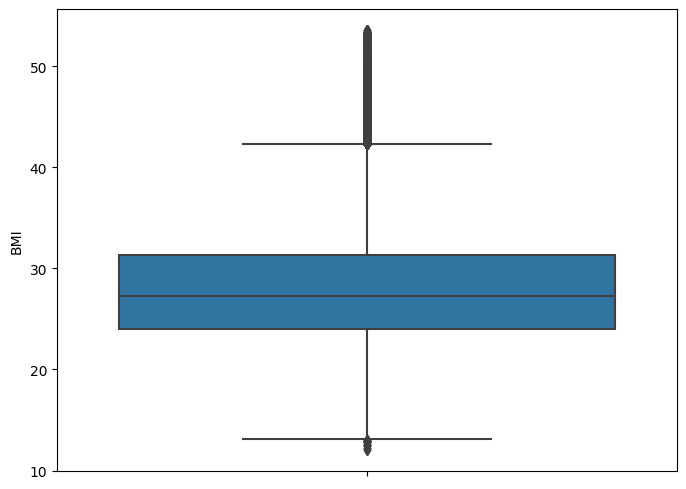

In [113]:
# 이상치 제거 후 박스플롯 시각화

plt.figure(figsize = (8,6))
sns.boxplot(y = 'BMI', data = df_rmv)
plt.show()

## 11.3 변수 구간화(Binning)

- 변수 구간화 : 데이터 분석의 성능을 향상시키기 위해 이산형 -> 범주형 변환
    - 평활화(Smoothing) : 변수의 값을 일적한 폭, 빈도로 구간으로 나눈후 -> 평균, 중앙값, 경계값 등으로 변환

<br>

- 효과적으로 구간화 되어 있는 지 아래로 측정 
    - WOE(Weight of Evidence) 
    - IV(Information Value) : 수치가 높을 수록 True, False를 구분할 수 있는 정보량이 많다는 뜻

In [114]:
# 필요한 패키지 설치 및 임포트
from xverse.transformer import WOE
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [115]:
# 데이터 불러오기

df = pd.read_csv("datasets/heart_2020_cleaned.csv")

# 데이터 샘플 확인
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [116]:
# BMI 컬럼의 분포 확인

df['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

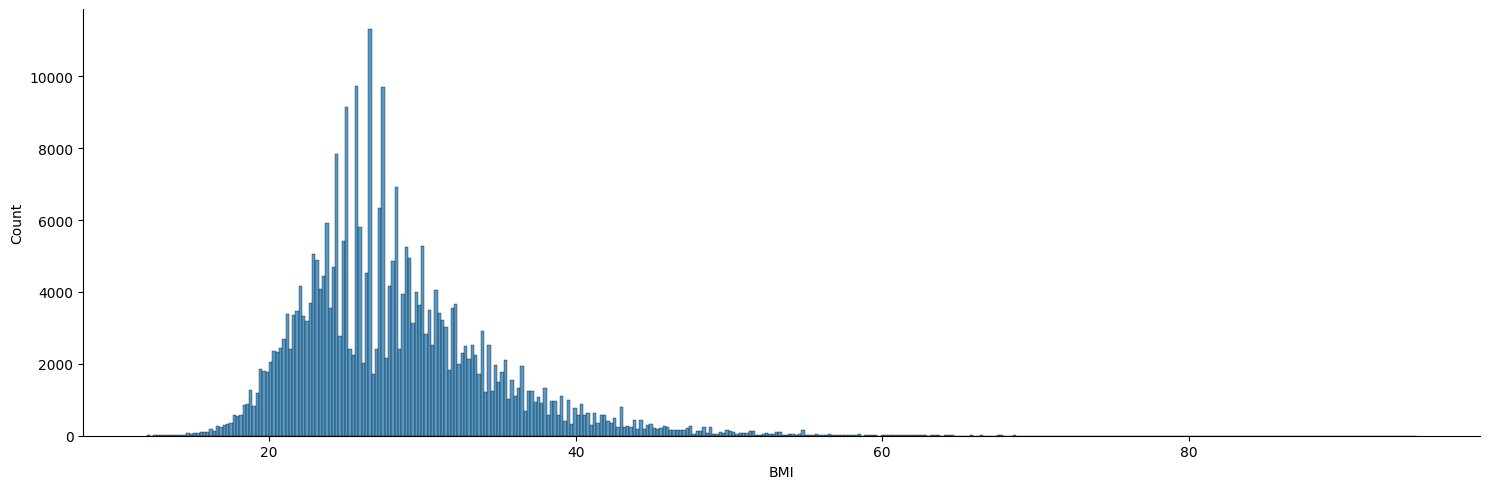

In [117]:
# BMI 칼럼 분포 시각화

%matplotlib inline
sns.displot(df['BMI'], height = 5, aspect = 3)

In [118]:
# 임의로 단순 구간화

df1 = df.copy() # 데이터셋 복사

# 구간화용 빈 칼럼 생성 - 생략해도 되지만 바로 옆에 붙여 보기 위함
df1.insert(2, 'BMI_bin', 0)

df1.loc[df1['BMI'] <= 20, 'BMI_bin'] = 'a'
df1.loc[(df1['BMI'] > 20) & (df1['BMI'] <= 30), 'BMI_bin'] = 'b'
df1.loc[(df1['BMI'] > 30) & (df1['BMI'] <= 40), 'BMI_bin'] = 'c'
df1.loc[(df1['BMI'] > 40) & (df1['BMI'] <= 50), 'BMI_bin'] = 'd'
df1.loc[(df1['BMI'] > 50) & (df1['BMI'] <= 60), 'BMI_bin'] = 'e'
df1.loc[(df1['BMI'] > 60) & (df1['BMI'] <= 70), 'BMI_bin'] = 'f'
df1.loc[df1['BMI'] < 70, 'BMI_bin'] = 'g'

df1.head()

,HeartDisease,BMI,BMI_bin,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,g,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,g,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,g,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,g,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,g,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [119]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   BMI_bin           319795 non-null  object 
 3   Smoking           319795 non-null  object 
 4   AlcoholDrinking   319795 non-null  object 
 5   Stroke            319795 non-null  object 
 6   PhysicalHealth    319795 non-null  float64
 7   MentalHealth      319795 non-null  float64
 8   DiffWalking       319795 non-null  object 
 9   Sex               319795 non-null  object 
 10  AgeCategory       319795 non-null  object 
 11  Race              319795 non-null  object 
 12  Diabetic          319795 non-null  object 
 13  PhysicalActivity  319795 non-null  object 
 14  GenHealth         319795 non-null  object 
 15  SleepTime         319795 non-null  float64
 16  Asthma            31

TypeError: 'value' must be an instance of str or bytes, not a int

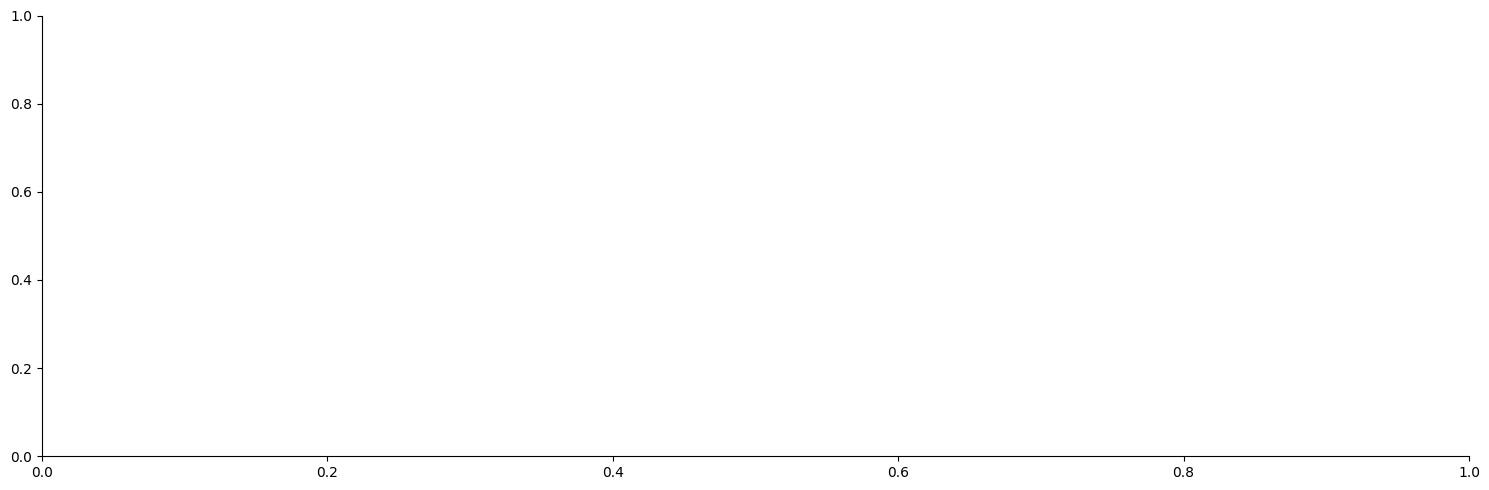

In [120]:
# 구간화 변수 분포 시각화


sns.displot(df1['BMI_bin'], height = 5, aspect = 3)

In [ ]:
# cut 함수 사용하여 임의로 구간화
df1.insert(3, 'BMI_bin2', 0) # 구간화용 빈 칼럼 생성

df1['BMI_bin2'] = pd.cut(df1.BMI, bins = [0,20,30,40,50,60,70,95],
                         labels = ['a','b','c','d','e','f','g'])
                


df1.head()

,HeartDisease,BMI,BMI_bin,BMI_bin2,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,g,a,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,g,b,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,g,b,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,g,b,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,g,b,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


cut함수는 레이블의 수를 구간 기준 수보다 하나 작게 설정하는 것에 유의해야 한다.

In [ ]:
# BIM_bin2 구간별 관측치 수 집계

df1.BMI_bin2.value_counts().to_frame().style.background_gradient(cmap = 'winter')

,count
BMI_bin2,
b,202548
c,86198
a,14699
d,13839
e,2019
f,363
g,129


In [ ]:
# qcut() 함수 사용하여 자동 구간화

df1.insert(4, 'BMI_bin3', 0) # 구간화용 빈 칼럼 생성

df1['BMI_bin3'] = pd.qcut(df1.BMI, q = 7, labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g'])

df1.head()

,HeartDisease,BMI,BMI_bin,BMI_bin2,BMI_bin3,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,...,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,g,a,a,Yes,No,No,3.0,30.0,...,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,g,b,a,No,No,Yes,0.0,0.0,...,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,g,b,d,Yes,No,No,20.0,30.0,...,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,g,b,b,No,No,No,0.0,0.0,...,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,g,b,b,No,No,No,28.0,0.0,...,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


BMI 칼럼과 같이 긴 꼬리 분포를 가진 경우에는 동일한 간격으로 구간화를 할 경우, 포함되는 관측치가 너무 희소한 범주가 생겨 모델의 성능을 감소시킬 수 있다. 그래서 이와 같은 구간화 방식이 유용하게 사용될 수 있다.

In [ ]:
# BMI_bin3 구간별 관측치 수 집계


df1.BMI_bin3.value_counts().to_frame().style.background_gradient(cmap = 'winter') # style.background_gradient 수치의 크기를 색상 온도로 보는 것

,count
BMI_bin3,
b,47309
a,45980
d,45944
f,45805
g,45255
e,44977
c,44525


In [ ]:
df1.BMI_bin3.value_counts()

BMI_bin3
b    47309
a    45980
d    45944
f    45805
g    45255
e    44977
c    44525
Name: count, dtype: int64

In [ ]:
df1.BMI_bin3.value_counts().to_frame()

,count
BMI_bin3,
b,47309
a,45980
d,45944
f,45805
g,45255
e,44977
c,44525


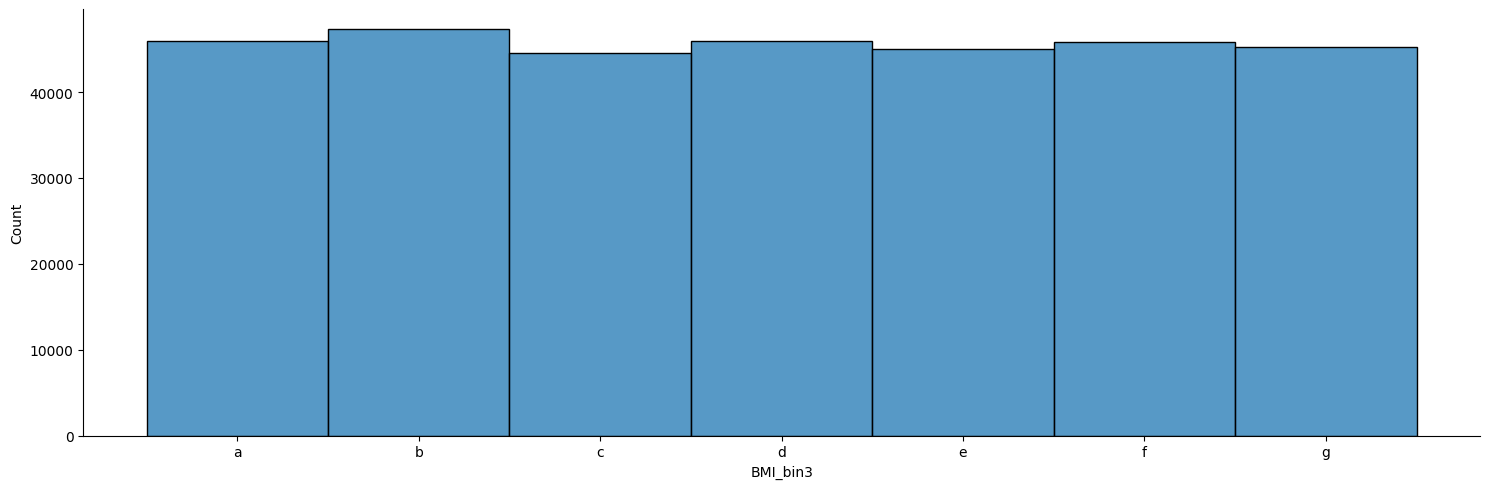

In [ ]:
# BMI 분포 시각화

sns.displot(df1['BMI_bin3'], height = 5, aspect = 3)

In [ ]:
import numpy as np

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   HeartDisease      319795 non-null  object  
 1   BMI               319795 non-null  float64 
 2   BMI_bin           319795 non-null  object  
 3   BMI_bin2          319795 non-null  category
 4   BMI_bin3          319795 non-null  category
 5   Smoking           319795 non-null  object  
 6   AlcoholDrinking   319795 non-null  object  
 7   Stroke            319795 non-null  object  
 8   PhysicalHealth    319795 non-null  float64 
 9   MentalHealth      319795 non-null  float64 
 10  DiffWalking       319795 non-null  object  
 11  Sex               319795 non-null  object  
 12  AgeCategory       319795 non-null  object  
 13  Race              319795 non-null  object  
 14  Diabetic          319795 non-null  object  
 15  PhysicalActivity  319795 non-null  object  
 16  Ge

In [ ]:
df2 = df.copy # 데이터셋 복사

# xverse 함수 적용을 위한 더미변수 변환
df2 = pd.get_dummies(df)

# 구간화할 칼럼(X), 기준 칼럼(y) 지정
X = df2[['PhysicalHealth']]
y = df2[['PhysicalHealth']]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 52 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   BMI                                  319795 non-null  float64
 1   PhysicalHealth                       319795 non-null  float64
 2   MentalHealth                         319795 non-null  float64
 3   SleepTime                            319795 non-null  float64
 4   HeartDisease_No                      319795 non-null  bool   
 5   HeartDisease_Yes                     319795 non-null  bool   
 6   Smoking_No                           319795 non-null  bool   
 7   Smoking_Yes                          319795 non-null  bool   
 8   AlcoholDrinking_No                   319795 non-null  bool   
 9   AlcoholDrinking_Yes                  319795 non-null  bool   
 10  Stroke_No                            319795 non-null  bool   
 11  Stroke_Yes   

In [ ]:
# WOE를 사용한 변수 구간화

df2 = df.copy()  # 데이터셋 복사


# xverse 함수 적용을 위한 더미변수 변환
df2=pd.get_dummies(df)

# 구간화 할 컬럼(X), 기준 컬럼(y) 지정
X = df2[['PhysicalHealth']]
y = df2[['KidneyDisease_Yes']]

y = y.T.squeeze() # 차원 축소

# WOE 모델 설정 및 적용
clf = WOE()
clf.fit(X, y)

# 구간 기준점 및 eight of Evidence 값 테이블 생성
a=clf.woe_df 

#Information Value 데이블 생성
b=clf.iv_df

a.head()

AttributeError: module 'pandas.core.algorithms' has no attribute 'quantile'

## 11.4 데이터 표준화와 정규화 스케일링

: 독립 변수들이 서로 단위가 다르거나 편차가 심할 떄 값의 스케일을 일정 수준으로 변환시켜줌 <br>
-> 표준화, 정규화 스케일링 


- 독립변수 간 단위가 다른 것은 회귀분석, 의사결정나무 등 대부분의 데이터 마이닝 모델의 분석 결과에 별다른 영향을 미치지 않기 때문에 그대로 사용 가능
- but, **표준화나 정규화는 특정 머신러닝 모델의 학습 효율을 증가시키기 때문에 많이 사용**



----

**표준화**
- 각 관측치의 값이 전체 평균을 기준으로 어느 정도 떨어져 있는지 나타낼 떄 사용

**정규화**
- 데이터의 범위를 0부터 1까지로 변환하여 데이터 분포를 조정하는 방법

표준화는 평균에서 얼마나 많이 떨어져 있는지 나타냄.
정규화는 가장 큰값 1, 작은 값 0으로 직관적으로 표현 -> 특정값이 평균으로부터 어느 정도 떨어져 있는지를 바로 알기 히듬


**로버스트스케일**
- 평균이 기준이 아닌 중앙값을 기준으로 스케일링 진행
- 이상치의 영향력을 최소화하여 일반적으로 표준화, 정규화보다 성능이 우수

In [ ]:
# 필요한 패키지 Import


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# 데이터 불러오기
df = pd.read_csv("datasets/wine-clustering.csv")

# 데이터 샘플 확인
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# 기존 데이터 칼럼별 평균, 분산 확인

# 각 컬럼의 평균값

print(df.mean())
print("\n")

# 각 컬럼의 분산값
print(df.var())

Alcohol                  13.000618
Malic_Acid                2.336348
Ash                       2.366517
Ash_Alcanity             19.494944
Magnesium                99.741573
Total_Phenols             2.295112
Flavanoids                2.029270
Nonflavanoid_Phenols      0.361854
Proanthocyanins           1.590899
Color_Intensity           5.058090
Hue                       0.957449
OD280                     2.611685
Proline                 746.893258
dtype: float64


Alcohol                     0.659062
Malic_Acid                  1.248015
Ash                         0.075265
Ash_Alcanity               11.152686
Magnesium                 203.989335
Total_Phenols               0.391690
Flavanoids                  0.997719
Nonflavanoid_Phenols        0.015489
Proanthocyanins             0.327595
Color_Intensity             5.374449
Hue                         0.052245
OD280                       0.504086
Proline                 99166.717355
dtype: float64


In [ ]:
# 전체 칼럼 표준화

# 데이터 표준화 적용
StandardScaler = StandardScaler()
df_stand = StandardScaler.fit_transform(df)

# 칼럼명 결합
df_stand = pd.DataFrame(data=df_stand, columns = df.columns)

df_stand.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [ ]:
# 데이터 표준화 스케일링 후 칼럼별 평균, 분산 확인

# 각 컬럼의 평균값
print(df_stand.mean())
print('/n')

# 각 칼럼의 분산값
print(df_stand.var())

Alcohol                -8.382808e-16
Malic_Acid             -1.197544e-16
Ash                    -8.370333e-16
Ash_Alcanity           -3.991813e-17
Magnesium              -3.991813e-17
Total_Phenols           0.000000e+00
Flavanoids             -3.991813e-16
Nonflavanoid_Phenols    3.592632e-16
Proanthocyanins        -1.197544e-16
Color_Intensity         2.494883e-17
Hue                     1.995907e-16
OD280                   3.193450e-16
Proline                -1.596725e-16
dtype: float64
/n
Alcohol                 1.00565
Malic_Acid              1.00565
Ash                     1.00565
Ash_Alcanity            1.00565
Magnesium               1.00565
Total_Phenols           1.00565
Flavanoids              1.00565
Nonflavanoid_Phenols    1.00565
Proanthocyanins         1.00565
Color_Intensity         1.00565
Hue                     1.00565
OD280                   1.00565
Proline                 1.00565
dtype: float64


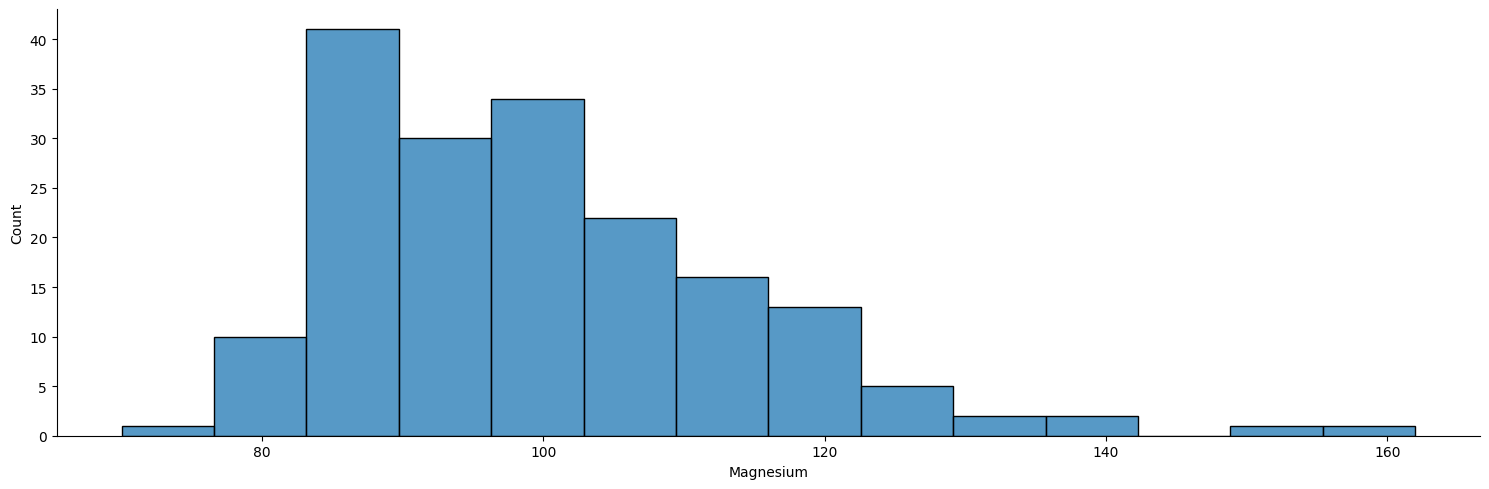

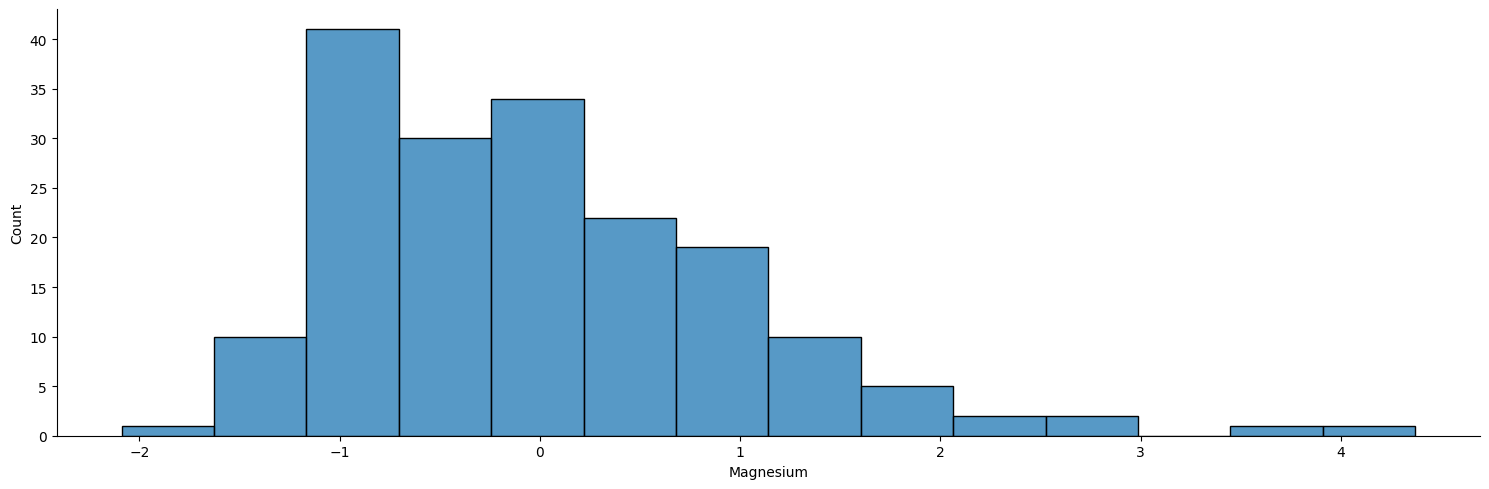

In [ ]:
# Magnesium 컬럼 표준화 스케일링 전과 후 분포 비교

%matplotlib inline
sns.displot(df['Magnesium'], height = 5, aspect = 3)
sns.displot(df_stand['Magnesium'], height = 5, aspect = 3)


plt.show()

In [ ]:
# 전체 컬럼 정규화

# 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df)

In [ ]:
# 칼럼명 결합
df_minmax = pd.DataFrame(data=df_minmax, columns = df.columns)

df_minmax.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


MinMax 함수를 사용하여 데이터 정규화 스케일링을 적용함. 적용 방식은 앞의 표준화와 동일

In [ ]:
# 정규화 적용 칼럼 최솟값, 최댓값 확인

print(df_minmax.min()) # 최솟값
print('\n')
print(df_minmax.max()) # 최댓값

Alcohol                 0.0
Malic_Acid              0.0
Ash                     0.0
Ash_Alcanity            0.0
Magnesium               0.0
Total_Phenols           0.0
Flavanoids              0.0
Nonflavanoid_Phenols    0.0
Proanthocyanins         0.0
Color_Intensity         0.0
Hue                     0.0
OD280                   0.0
Proline                 0.0
dtype: float64


Alcohol                 1.0
Malic_Acid              1.0
Ash                     1.0
Ash_Alcanity            1.0
Magnesium               1.0
Total_Phenols           1.0
Flavanoids              1.0
Nonflavanoid_Phenols    1.0
Proanthocyanins         1.0
Color_Intensity         1.0
Hue                     1.0
OD280                   1.0
Proline                 1.0
dtype: float64


In [ ]:
# 데이터 정규화 스케일링 후 칼럼별 평균 분산 확인


# 각 컬럼의 평균값
print(df_minmax.mean())
print('\n')

# 각 칼럼의 분산값
print(df_minmax.var())

Alcohol                 0.518584
Malic_Acid              0.315484
Ash                     0.538244
Ash_Alcanity            0.458502
Magnesium               0.323278
Total_Phenols           0.453487
Flavanoids              0.356386
Nonflavanoid_Phenols    0.437460
Proanthocyanins         0.372523
Color_Intensity         0.322363
Hue                     0.388170
OD280                   0.491460
Proline                 0.334446
dtype: float64


Alcohol                 0.045641
Malic_Acid              0.048744
Ash                     0.021523
Ash_Alcanity            0.029633
Magnesium               0.024101
Total_Phenols           0.046574
Flavanoids              0.044407
Nonflavanoid_Phenols    0.055139
Proanthocyanins         0.032600
Color_Intensity         0.039127
Hue                     0.034533
OD280                   0.067636
Proline                 0.050451
dtype: float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


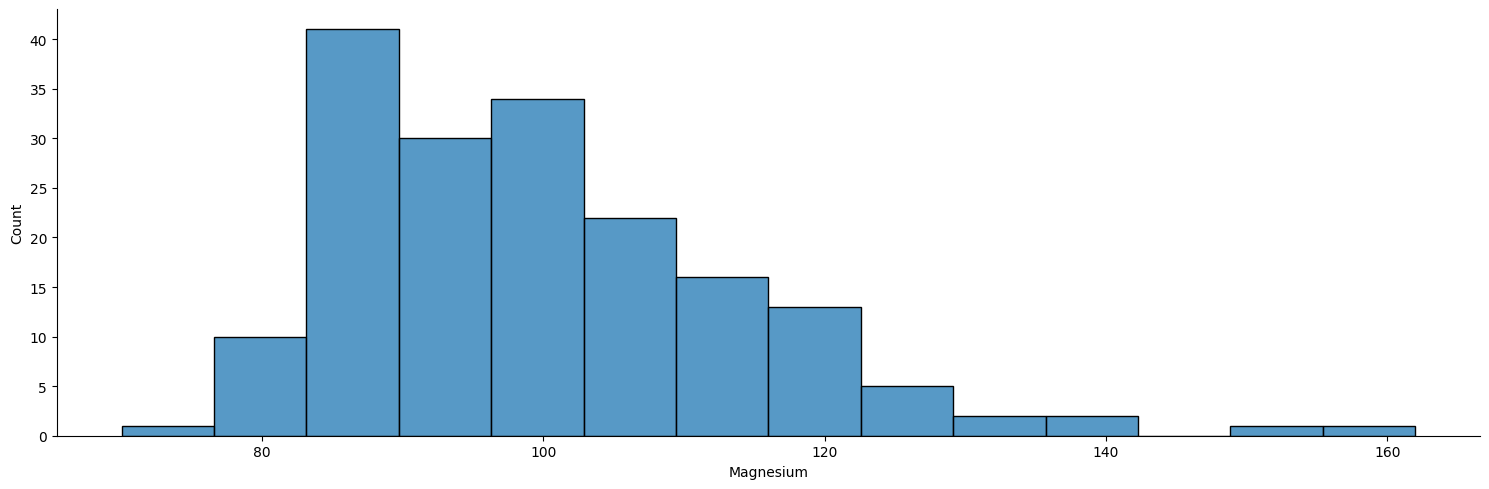

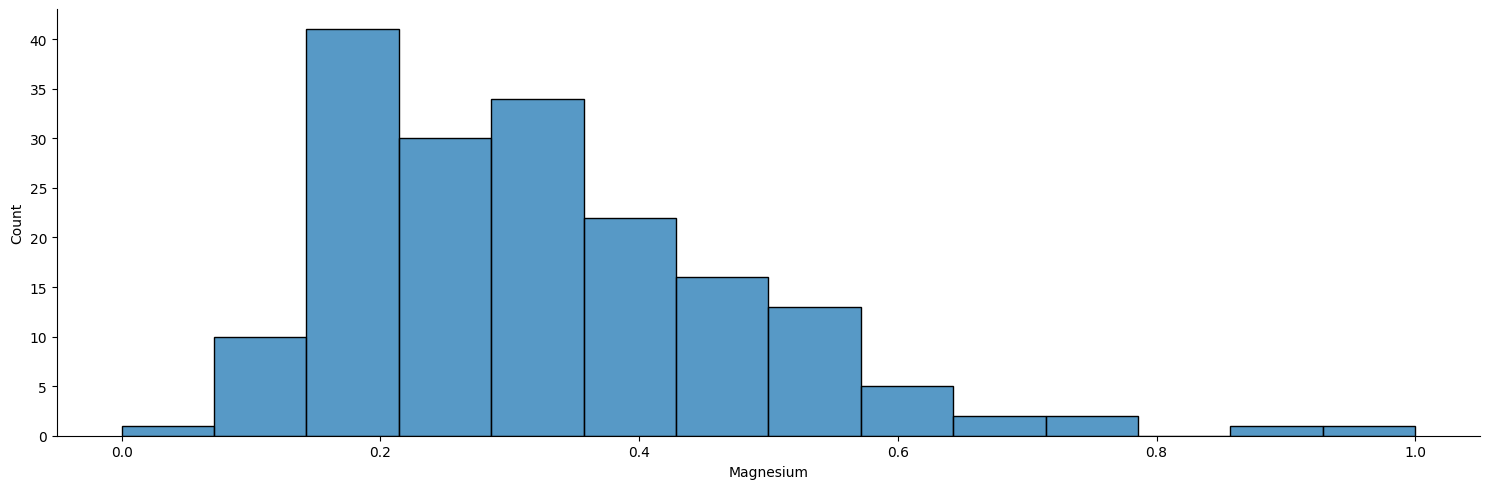

In [ ]:
# Magnesium 칼럼 정규화 스케일링 전과 후 분포 비교

%matplotlib inline
sns.displot(df['Magnesium'], height = 5, aspect = 3)
sns.displot(df_minmax['Magnesium'], height = 5, aspect = 3)


plt.show()

In [ ]:
# 전체 칼럼 RobustScaler

# 데이터 RobustScaler 적용
RobustScaler = RobustScaler()
df_robust = RobustScaler.fit_transform(df)

# 칼럼명 결합
df_robust = pd.DataFrame(data = df_robust, columns = df.columns)

df_robust.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.897338,-0.104730,0.201439,-0.906977,1.526316,0.420804,0.553892,-0.358209,1.050000,0.318792,0.222222,0.924949,0.808050
1,0.114068,-0.057432,-0.633094,-1.930233,0.105263,0.278960,0.374251,-0.477612,-0.392857,-0.104027,0.251852,0.503043,0.777090
2,0.083650,0.334459,0.892086,-0.209302,0.157895,0.420804,0.661677,-0.238806,1.792857,0.332215,0.192593,0.316430,1.055728
3,1.003802,0.057432,0.402878,-0.627907,0.789474,1.413712,0.811377,-0.597015,0.892857,1.043624,-0.311111,0.543611,1.664603
4,0.144487,0.489865,1.467626,0.348837,1.052632,0.420804,0.332335,0.298507,0.378571,-0.124161,0.222222,0.121704,0.126935


In [ ]:
# 데이터 RobustSacler 적용 후 칼럼별 평균, 분ㅅ난 확인

# 각 컬럼의 평균값
print(df_robust.mean())
print('\n')

# 각 칼럼의 분산값

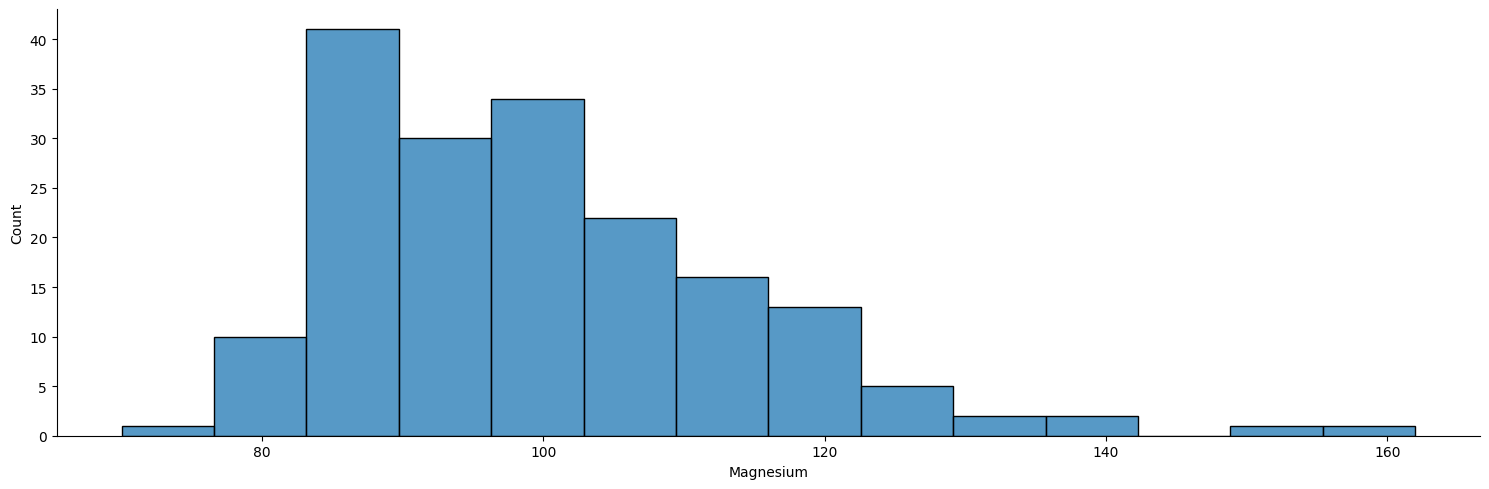

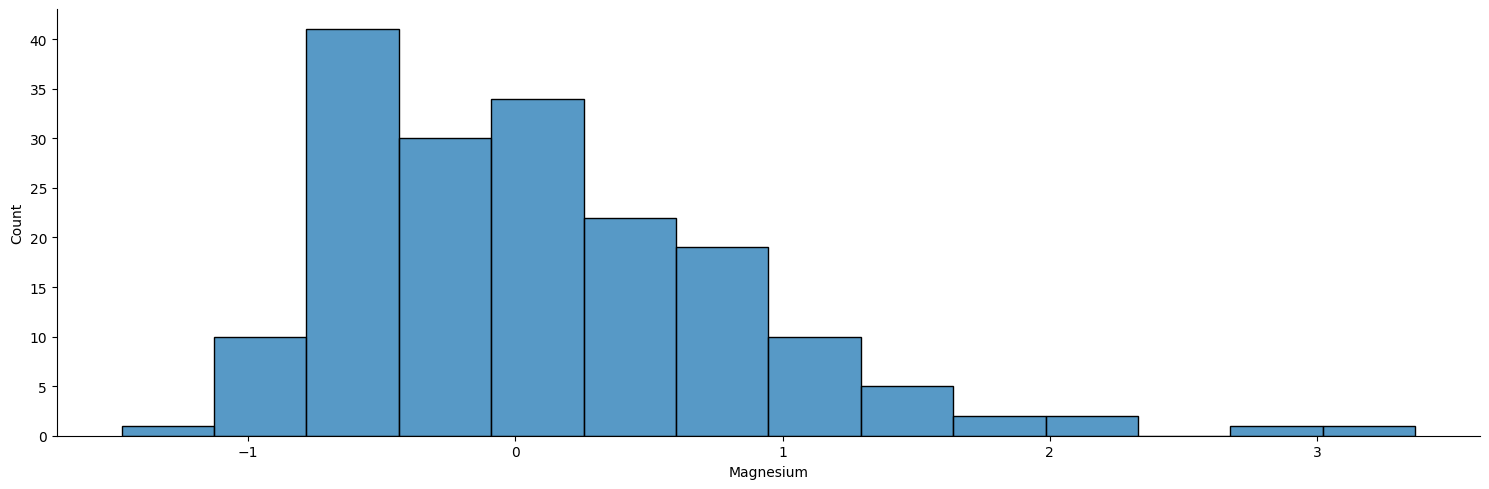

In [ ]:
# Magnesium 칼럼 RobustScaler 스케일링 전과 후 분포 비교

%matplotlib inline
sns.displot(df['Magnesium'], height = 5, aspect = 3)
sns.displot(df_robust['Magnesium'], height = 5, aspect = 3)


plt.show()

## 11.5 모델 성능 향상을 위한 파생 변수 생성

- 파생변수(Derived variable) : 원래 있던 변수들을 조합하거나 함수를 적용하여 새로 만들어낸 변수
    - 데이터 구간화, 표준화 및 정규화 등도 일종의 파생변수
    - 기존 값에 로그나 제곱근을 취해 변동성을 완화시키거나 지수함수를 사용하여 분산을 증폭 시킬 수도 있음 <br>
    
> 파생 변수는 데이터의 특성을 이용하여 분석 효율을 높이는 것. <br>
    전체 데이터에 대한 파악이 중요 + 해당 비즈니스 도메인에 대한 충분한 이해 필요

ex) 온라인 쇼핑몰의 판매량을 예측하는 모델을 만든다고 할 때, 전주 대비 방문 횟수 증감률, 전년도 대비 클릭 횟수 증감률 등의 파생변수 만들어서 모델 예측력 높일 수 있음


> 본격적인 데이터 분석 모델링을 하기 전에 충분한 데이터 탐색 및 시각화 작업이 필요
- 데이터 탐색 과정을 통해 증감률이 중요할 것으로 유추하는 것이 가능 

ex) A 제품은 어떤 특성이 있어, 20살, 30살 과 같이 앞자리 숫자가 바뀌는 나이대에 구매가 많이 일어난다면, 해당 나이대를 구분하는 파생변수를 생성해주변 분석 모델 성능을 향상시킬 수 있음

<br>
<br>

**주의)**
- 파생변수는 기존의 변수를 활용해서 만들어낸 변수 -> 다중공선성 문제가 발생할 확률 높음
- 파생변수 생성 후, 상관분석을 통해 변수 간의 상관성 확인!!!
- 상관분석 후, 파생변수만 사용? 기본변수 + 파생변수 사용? 등 고민해야함
- 또는, 변수들 조합의 주요 속성만 추출해내는 주성분 분석(PCA) 등을 사용할 수 있음


In [177]:
# 필요한 패키지 import

import math
from sklearn import preprocessing
import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [178]:
# 데이터 불러오기

df = pd.read_csv("datasets/scanner_data.csv")

# 데이터 샘플 확인
df.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


각 상품의 고유 코드인 sku_category 등이 있음

In [179]:
# 두 개의 변수 결합한 파생변수 생성

# 구매 상품당 가격 칼럼 생성
df['Unit_amount'] = df['Sales_Amount']/ df['Quantity']

# 총 구매가격 컬럼 생성
df['Al_amount'] = df[['Quantity', 'Sales_Amount']].apply(lambda series: series.prod(), axis=1)

df.tail()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Unit_amount,Al_amount
131701,131702,04/07/2016,20203,32900,IEV,FO112,3.0,6.46,2.153333,19.38
131702,131703,04/07/2016,20203,32900,N8U,I36F2,1.0,4.50,4.500000,4.50
131703,131704,04/07/2016,20203,32900,U5F,4X8P4,1.0,5.19,5.190000,5.19
131704,131705,04/07/2016,20203,32900,0H2,ZVTO4,1.0,4.57,4.570000,4.57
131705,131706,04/07/2016,20203,32900,Q4N,QM9BP,1.0,13.68,13.680000,13.68


In [180]:
# 로그, 제곱근, 제곱 변환 파생변수 생성


# 방법1. Sales_Amount 칼럼 로그 적용(+1)
df['Sales_Amount_log'] = preprocessing.scale(np.log(df['Sales_Amount']+1))

# 방법2. Sales_Amount 칼럼 로그 적용 (+1)
df['Sales_Amount_log'] = df[['Sales_Amount']].apply(lambda x: np.log(x+1))

# Sales_Amount 칼럼 제곱근 적용(+1)
df['Sales_Amount_sqrt'] = np.sqrt(df['Sales_Amount'] +1)

# Sales_Amount 칼럼 제곱 적용
df['Sales_Amount_pow'] = pow(df[['Sales_Amount']],2)

df.tail()


,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Unit_amount,Al_amount,Sales_Amount_log,Sales_Amount_sqrt,Sales_Amount_pow
131701,131702,04/07/2016,20203,32900,IEV,FO112,3.0,6.46,2.153333,19.38,2.009555,2.731300,41.7316
131702,131703,04/07/2016,20203,32900,N8U,I36F2,1.0,4.50,4.500000,4.50,1.704748,2.345208,20.2500
131703,131704,04/07/2016,20203,32900,U5F,4X8P4,1.0,5.19,5.190000,5.19,1.822935,2.487971,26.9361
131704,131705,04/07/2016,20203,32900,0H2,ZVTO4,1.0,4.57,4.570000,4.57,1.717395,2.360085,20.8849
131705,131706,04/07/2016,20203,32900,Q4N,QM9BP,1.0,13.68,13.680000,13.68,2.686486,3.831449,187.1424


In [181]:
# 월 합계, 평균 구매금액 변수 생성




# date 칼럼 날짜형식 변환
df['Date2'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', infer_datetime_format = True)
#df['Date2'] = pd.to_datetime(df['Date'], infer_datetime_format = True) # 형식 문제로 에러남



/var/folders/qy/nmhtfjns7_ndskm37_gyhd980000gn/T/ipykernel_83655/1556112909.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date2'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', infer_datetime_format = True)


In [184]:
df_sm 

,Year,Month,Customer_ID,sum,mean
0,2016,1,1,16.29,8.145000
1,2016,1,3,10.92,3.640000
2,2016,1,11,6.35,6.350000
3,2016,1,12,21.00,21.000000
4,2016,1,13,30.32,30.320000
...,...,...,...,...,...
46174,2016,12,22621,9.69,4.845000
46175,2016,12,22622,6.07,6.070000
46176,2016,12,22623,128.01,64.005000
46177,2016,12,22624,19.60,9.800000


In [187]:
##### 여기서 무언가 잘 못 된 것 같음
# 연도 컬럼 생성
df['Year'] = df['Date2'].dt.year

# 월 칼럼 생성
df['Month'] = df['Date2'].dt.month

# 연월별, 고객별 매출 합계, 평균 칼럼 생성
df_sm = df.groupby(['Year', 
                    'Month',
                    'Customer_ID'])['Sales_Amount'].agg(['sum', 'mean']).reset_index()

# 기존 일변 테이블에 평균 테이블 조인

df2 = pd.merge(df, df_sm, how = 'left')

df2.tail()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Unit_amount,Al_amount,Sales_Amount_log,Sales_Amount_sqrt,Sales_Amount_pow,Date2,Year,Month,sum,mean
131701,131702,04/07/2016,20203,32900,IEV,FO112,3.0,6.46,2.153333,19.38,2.009555,2.731300,41.7316,2016-07-04,2016,7,61.36,7.67
131702,131703,04/07/2016,20203,32900,N8U,I36F2,1.0,4.50,4.500000,4.50,1.704748,2.345208,20.2500,2016-07-04,2016,7,61.36,7.67
131703,131704,04/07/2016,20203,32900,U5F,4X8P4,1.0,5.19,5.190000,5.19,1.822935,2.487971,26.9361,2016-07-04,2016,7,61.36,7.67
131704,131705,04/07/2016,20203,32900,0H2,ZVTO4,1.0,4.57,4.570000,4.57,1.717395,2.360085,20.8849,2016-07-04,2016,7,61.36,7.67
131705,131706,04/07/2016,20203,32900,Q4N,QM9BP,1.0,13.68,13.680000,13.68,2.686486,3.831449,187.1424,2016-07-04,2016,7,61.36,7.67


In [155]:
## 월 단위 변수와 일 단위 변수를 활용한 파생변수 생성

# 월 평균 구매금액 대비 일별 구매금액 차이 변수 생성
df2['Sales_Amount_Diff'] = df2['mean'] - df2['Sales_Amount']

# 월 평균 구매금액 대비 일별 구매금액 비율 변수 생성
df2['Sales_Amount_UD'] = df2['Sales_Amount']/df2['mean']

# 월 총 구매금액 대비 일별 구매금액 비율 변수 생성
df2['Sales_Amount_Rto'] = df2['Sales_Amount']/df2['sum']

df2.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Unit_amount,Al_amount,...,Sales_Amount_sqrt,Sales_Amount_pow,Date2,Year,Month,sum,mean,Sales_Amount_Diff,Sales_Amount_UD,Sales_Amount_Rto
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,3.13,3.13,...,2.032240,9.7969,2016-01-02,2016,1,27.01,6.752500,3.622500,0.463532,0.115883
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,5.46,5.46,...,2.541653,29.8116,2016-01-02,2016,1,14.05,3.512500,-1.947500,1.554448,0.388612
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,6.35,6.35,...,2.711088,40.3225,2016-01-02,2016,1,135.16,7.113684,0.763684,0.892646,0.046981
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59,5.59,5.59,...,2.567100,31.2481,2016-01-02,2016,1,244.83,9.793200,4.203200,0.570804,0.022832
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88,6.88,6.88,...,2.807134,47.3344,2016-01-02,2016,1,6.88,6.880000,0.000000,1.000000,1.000000


월평균 구매금액 대비 일별 구매금액 차이를 계산한 변수는 구매금액 수준이 평소에 비해 얼마나 높거나 낮아졌는지 알 수 있음 -> 이탈 감지 변수로 활용 가능

In [163]:
df2['Date2_1_m']

0        2016-01-30
1        2016-01-30
2        2016-01-30
3        2016-01-30
4        2016-01-30
            ...    
131701   2016-08-01
131702   2016-08-01
131703   2016-08-01
131704   2016-08-01
131705   2016-08-01
Name: Date2_1_m, Length: 131706, dtype: datetime64[ns]

In [165]:
# 전월 값 파생변수 생성

# 4주 뒤 시점 칼럼 생성
df2['Date2_1_m'] = df2['Date2'] + timedelta(weeks=4)

# 4주 뒤 시점연도 칼럼 생성
df['Year_1_m'] = df2['Date2_1_m'].dt.year

# 4주 뒤 시점월 칼럼 생성
df['Month_1_m'] = df2['Date2_1_m'].dt.month

# 4주 전 구매금액 연월별, 고객별 매출 평균 칼럼 생성
df_Mn_1 = df.groupby(['Year_1_m',
                      'Month_1_m',
                      'Customer_ID'])['Sales_Amount'].agg(['sum', 'mean']).reset_index()


# 조인을 위한 칼럼명 변경
df_Mn_1.rename(columns = {'Year_1_m' : 'Year',
                         'Month_1_m' : 'Month',
                         'sum' : 'sum_1_m',
                         'mean' : 'mean_1_m'}, inplace = True)


df2 = pd.merge(df2, df_Mn_1, how = 'left')


df2.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Unit_amount,Al_amount,...,Year,Month,sum,mean,Sales_Amount_Diff,Sales_Amount_UD,Sales_Amount_Rto,Date2_1_m,sum_1_m,mean_1_m
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,3.13,3.13,...,2016,1,27.01,6.752500,3.622500,0.463532,0.115883,2016-01-30,3.13,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,5.46,5.46,...,2016,1,14.05,3.512500,-1.947500,1.554448,0.388612,2016-01-30,5.46,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,6.35,6.35,...,2016,1,135.16,7.113684,0.763684,0.892646,0.046981,2016-01-30,6.35,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59,5.59,5.59,...,2016,1,244.83,9.793200,4.203200,0.570804,0.022832,2016-01-30,5.59,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88,6.88,6.88,...,2016,1,6.88,6.880000,0.000000,1.000000,1.000000,2016-01-30,6.88,6.88


In [170]:
# 전월과의 차이 파생변수 생성

# 전월 대비 구매금액 평균 차이 변수 생성
df2['Mn_diff_1_mean'] = df2['mean'] - df2['mean_1_m']

# 전월 대비 총 구매금액 차이 변수 생성
df2['Mn_diff_1_sum'] = df2['sum'] - df2['sum_1_m']


df2.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Unit_amount,Al_amount,...,sum,mean,Sales_Amount_Diff,Sales_Amount_UD,Sales_Amount_Rto,Date2_1_m,sum_1_m,mean_1_m,Mn_diff_1_mean,Mn_diff_1_sum
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,3.13,3.13,...,27.01,6.752500,3.622500,0.463532,0.115883,2016-01-30,3.13,3.13,3.622500,23.88
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,5.46,5.46,...,14.05,3.512500,-1.947500,1.554448,0.388612,2016-01-30,5.46,5.46,-1.947500,8.59
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,6.35,6.35,...,135.16,7.113684,0.763684,0.892646,0.046981,2016-01-30,6.35,6.35,0.763684,128.81
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59,5.59,5.59,...,244.83,9.793200,4.203200,0.570804,0.022832,2016-01-30,5.59,5.59,4.203200,239.24
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88,6.88,6.88,...,6.88,6.880000,0.000000,1.000000,1.000000,2016-01-30,6.88,6.88,0.000000,0.00


## 11.6 슬라이딩 윈도우 데이터 가공


- 슬라이딩 윈도우(Sliding Window) : 본래 실시간 네트워크 패킷 데이터를 처리하는 기법 <br>

        - 현재 시점으로부터 +- M 기간의 데이터를 일정 간격의 시간마다 전송하는 방식
        - 각각의 데이터 조각(window)들이 서로 겹치며 데이터가 전송되는 것

=> 데이터를 겹쳐 나눔으로써 전체 데이터가 증가하는 원리를 차용한 것이 슬라이딩 윈도우 데이터 가공의 핵심


**활용방안**

- 예측 모델에서 유용하게 쓰임

        - 인터넷 쇼핑몰에서 고객의 지난 5개월간 구매내역, 방문 횟수 등 -> 한달간의 재구매 확률을 구하는 모델을 만듬

 
> if) <br>
구매 내역 데이터가 충분하지 않을 경우 예측력이 좋은 모델을 만드는 것이 어려움 <br>
학습 데이터의 시기와 예측 데이터의 시기와의 시점 차이가 크기 때문에 예측력이 떨어질 위험이 있는 경우 <br>
**슬라이딩 윈도우 방법을 활용** -> 많은 분석 데이터셋 확보, 학습데이터의 최근성을 가질 수 있음


예시, 사진 슬라이딩 윈도우 참고

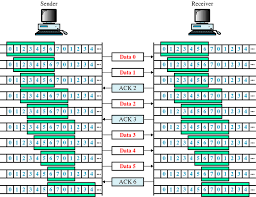


동일한 사람이여도, 1월 - 5월 활동 정보와 2월 - 6월 활동 정보를 다른 것임.
1-5월 활동 후 6월 구매 X
2-6월 활동 후 7월 구매 O

**각각의 기간을 서로 다른 관측치로 간주하여 분석 모델에 사용하는 것이 가능**


<br>

참고 
- [모델 예측력을 높이는, 슬라이딩 윈도우 방법](https://www.google.com/imgres?imgurl=https%3A%2F%2Fmblogthumb-phinf.pstatic.net%2FMjAyMTA4MTBfMTQ0%2FMDAxNjI4NTk1Nzg2NjY1.IwJfZJtEe1WJIz6GaTF1vhGVGagl3bLzrp2Ew_6qY-wg.WJAF7-0q2m8njkKd7zZ84CuIkBgaxr7WUNXyHMT2SaUg.PNG.angryking%2Fimage.png%3Ftype%3Dw800&tbnid=N0uIOd1IppPFqM&vet=12ahUKEwjox635s7z_AhUZ82EKHbfUA4QQMygAegUIARC6AQ..i&imgrefurl=https%3A%2F%2Fblog.naver.com%2FPostView.naver%3FblogId%3Dangryking%26logNo%3D222464728546%26categoryNo%3D23%26parentCategoryNo%3D0%26viewDate%3D%26currentPage%3D1%26postListTopCurrentPage%3D1%26from%3DpostView&docid=T2lOVO-rvZdSAM&w=800&h=373&q=%EC%8A%AC%EB%9D%BC%EC%9D%B4%EB%94%A9%20%EC%9C%88%EB%8F%84%EC%9A%B0%20%EB%B0%A9%EB%B2%95%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D&ved=2ahUKEwjox635s7z_AhUZ82EKHbfUA4QQMygAegUIARC6AQ)


In [1]:
# 필요한 패키지 import

from dateutil.relativedelta import relativedelta # 날짜형 데이터를 다룰 수 있음
import numpy as np
import pandas as pd

In [2]:
# 데이터 불러오기
df_raw = pd.read_csv("datasets/shopping_mall.csv")

# 데이터 샘플 확인
df_raw.head()

,cust_id,dt,ym,sale_amt
0,AFG4127094465,2021-12-09,202112,300000
1,AFG4127094465,2022-04-22,202204,45000
2,AFG4136725677,2022-04-07,202204,47800
3,AFG4140129314,2022-02-07,202202,39200
4,AFG4144923657,2022-05-11,202205,110000


In [3]:
# 각 시점 기준 칼럼 생성

# 날짜형으로 변환
df_raw['Date2'] = pd.to_datetime(df_raw['dt'])

# 시점변수 생성
ym_li = [f"YM_M{i}" for i in range(6)]
ym_li  #['YM_M0', 'YM_M1', 'YM_M2', 'YM_M3', 'YM_M4', 'YM_M5']

for i in range(len(ym_li)):
    col = ym_li[i]
    now = pd.to_datetime('2022-05-01') + relativedelta(months = -i)


# 현재시점 기준 미래(-) 과거(+)
    df_raw[col] = 'M' + (-np.floor((df_raw.Date2 - now)
                                   /np.timedelta64(1, 'M'))).astype(int).astype(str)
    
df_raw.head()

,cust_id,dt,ym,sale_amt,Date2,YM_M0,YM_M1,YM_M2,YM_M3,YM_M4,YM_M5
0,AFG4127094465,2021-12-09,202112,300000,2021-12-09,M5,M4,M3,M2,M1,M0
1,AFG4127094465,2022-04-22,202204,45000,2022-04-22,M1,M0,M-1,M-2,M-3,M-4
2,AFG4136725677,2022-04-07,202204,47800,2022-04-07,M1,M0,M-1,M-2,M-3,M-4
3,AFG4140129314,2022-02-07,202202,39200,2022-02-07,M3,M2,M1,M0,M-1,M-2
4,AFG4144923657,2022-05-11,202205,110000,2022-05-11,M0,M-1,M-2,M-3,M-4,M-5


첫 번 쨰 행의 2021년 12월 9일은 기준으로 잡은 2022-05-01 부터 5개월 전 YM_MO = M5 이다. 그리고 2022-04-01(현재시점 한달 전) 기준으로는 M4이다

In [18]:
# # 슬라이딩 윈도우 형태로 변환

# m_col = ["M()".format(i) for i in range(6)] # M0 - M5 목록 생성 # ['M()', 'M()', 'M()', 'M()', 'M()', 'M()']
# df_li = [] # 임시 테이블 저장할 목록


# for n, ym in enumerate(ym_li): # YM_M0 ~ YM_M5 반복
# # STD_YM_M0 변수 기준 M0~M5 & 구매금액 0원 초과
#     tmp = df_raw[(df_raw[ym].isin(m_col)) & (df_raw['sale_amt'] > 0)]
# # YM_M0 기준 pivot
#     tmp = tmp.pivot_table(index = 'cust_id',
#                             columns = ym, values = 'sale_amt',
#                             aggfunc= 'sum')
#     print("1")
#     print(tmp)

#     # M0 ~ M12 중 누락된 칼럼 생성
#     # 추후 테이블 Union 위해 pivot 시 누락된 컬럼을 별도로 생성
#     missing_col = list(set(m_col) - set(tmp.columns))
#     for col in missing_col:
#         tmp[col] = 0
    
#     print("2")
#     print(tmp)
#     # 칼럼 이름 변경
#     tmp.columns = [f'sale_amt_{c}' for c in tmp.columns] # 생략 가능

#     tmp['MM_DIFF'] = ym
#     tmp = tmp.fillna(0)

#     df_li.append(tmp)


# final_df = pd.concat(df_li).reset_index()
# # final_df.head()
# 값이 좀 다르게 나오는 데, 이유를 못찾음.. //


1
Empty DataFrame
Columns: []
Index: []
2
Empty DataFrame
Columns: [M()]
Index: []
1
Empty DataFrame
Columns: []
Index: []
2
Empty DataFrame
Columns: [M()]
Index: []
1
Empty DataFrame
Columns: []
Index: []
2
Empty DataFrame
Columns: [M()]
Index: []
1
Empty DataFrame
Columns: []
Index: []
2
Empty DataFrame
Columns: [M()]
Index: []
1
Empty DataFrame
Columns: []
Index: []
2
Empty DataFrame
Columns: [M()]
Index: []
1
Empty DataFrame
Columns: []
Index: []
2
Empty DataFrame
Columns: [M()]
Index: []


In [30]:
# 슬라이딩 윈도우 형태로 변환

m_col = ["M{}".format(i) for i in range(6)]   # M0~M5 목록 생성
df_li = []   # 임시테이블 저장할 목록

for n, ym in enumerate(ym_li):  # YM_M0 ~ YM_M5 반복
# STD_YM_M0 변수 기준 M0~M5 & 구매금액 0원 초과         
    tmp = df_raw[(df_raw[ym].isin(m_col)) & (df_raw['sale_amt'] > 0)] 
# YM_M0 기준 pivot
    tmp = tmp.pivot_table(index='cust_id', 
                          columns=ym, values='sale_amt', 
                          aggfunc='sum') 
    
    # M0~M12 중 누락된 컬럼 생성
    # 추후 테이블 union을 위해 pivot시 누락된 컬럼을 별도로 생성해줌
    missing_col = list(set(m_col) - set(tmp.columns)) 
    for col in missing_col :
        tmp[col] = 0
    
    
    # 컬럼이름 변경
    tmp.columns = [f'slae_amt_{c}' for c in tmp.columns] # 생략 가능
    
    tmp['MM_DIFF'] = ym
    tmp = tmp.fillna(0)

    df_li.append(tmp)

final_df = pd.concat(df_li).reset_index()
final_df.head()

,cust_id,slae_amt_M0,slae_amt_M1,slae_amt_M2,slae_amt_M3,slae_amt_M4,slae_amt_M5,MM_DIFF
0,AFG4127094465,0.0,45000.0,0.0,0.0,0.0,300000.0,YM_M0
1,AFG4136725677,0.0,47800.0,0.0,0.0,0.0,0.0,YM_M0
2,AFG4140129314,0.0,0.0,0.0,39200.0,0.0,0.0,YM_M0
3,AFG4144923657,110000.0,0.0,0.0,0.0,0.0,0.0,YM_M0
4,AFG4154711536,0.0,0.0,0.0,45000.0,0.0,0.0,YM_M0


최종석으로 슬라이딩 윈도우 가공된 테이블을 생성함! <br>
실습에서는 기준 시점을 2022년 5월 1일로 지정했지만, 실무에서는 오늘 날짜를 기준으로 하여 사용해야함!

MM_DIFF 칼럼도 해당 연월로 대체하여 사용할 수 있음.

In [31]:
# 특정 고객의 시점별 형태 확인

df1 = final_df[(final_df['cust_id'] == 'AFG6825009314')]

df1

,cust_id,slae_amt_M0,slae_amt_M1,slae_amt_M2,slae_amt_M3,slae_amt_M4,slae_amt_M5,MM_DIFF
832,AFG6825009314,0.0,0.0,0.0,0.0,0.0,39200.0,YM_M0
1442,AFG6825009314,0.0,0.0,0.0,0.0,39200.0,0.0,YM_M1
1849,AFG6825009314,0.0,0.0,0.0,39200.0,0.0,0.0,YM_M2
2166,AFG6825009314,0.0,0.0,39200.0,0.0,0.0,0.0,YM_M3
2399,AFG6825009314,0.0,39200.0,0.0,0.0,0.0,0.0,YM_M4
2529,AFG6825009314,39200.0,0.0,0.0,0.0,0.0,0.0,YM_M5


기준시점이 2022년 5월인 경우 (MM_DIFF = YM_M0)에는 6달 전 구매 금액(sale_amt_M5)이 39,200원

1개월씩 과거 시점으로 갈 수록 구매금액 시점도 한 칼럼씩 옮겨짐

In [32]:
# 마지막 시점의 데이터 형태 확인
final_df.tail(10)

,cust_id,slae_amt_M0,slae_amt_M1,slae_amt_M2,slae_amt_M3,slae_amt_M4,slae_amt_M5,MM_DIFF
2523,AFG6544053758,78400.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2524,AFG6555046283,278000.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2525,AFG6575203354,99000.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2526,AFG6683774364,28000.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2527,AFG6728543455,89000.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2528,AFG6777275172,149000.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2529,AFG6825009314,39200.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2530,AFG6838532849,99000.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2531,AFG6846099516,129000.0,0.0,0.0,0.0,0.0,0.0,YM_M5
2532,AFG6860414162,139000.0,0.0,0.0,0.0,0.0,0.0,YM_M5


마지막 시점은 M0에만 값이 있다. 기존 데이터가 6개월 동안의 구매 데이터만 존재하기 때문이다. 마지막 시점인 2021년 12월의 1~5개월 전까지 데이터가 있어야만 온전한 데이터 활용이 가능.


이처럼 슬라이딩 윈도우는 필요한 기간을 먼저 고려하고 활용해야 함